<a href="https://colab.research.google.com/github/sunanda15/DataTools/blob/master/GMM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Histrogram of T90

[[ 2.49760435]
 [ 3.90300819]
 [-0.31314648]]
[[[0.78748163]]

 [[0.79592062]]

 [[1.23014454]]]


[GaussianMixture(),
 GaussianMixture(n_components=2),
 GaussianMixture(n_components=3),
 GaussianMixture(n_components=4),
 GaussianMixture(n_components=5),
 GaussianMixture(n_components=6),
 GaussianMixture(n_components=7),
 GaussianMixture(n_components=8),
 GaussianMixture(n_components=9),
 GaussianMixture(n_components=10)]

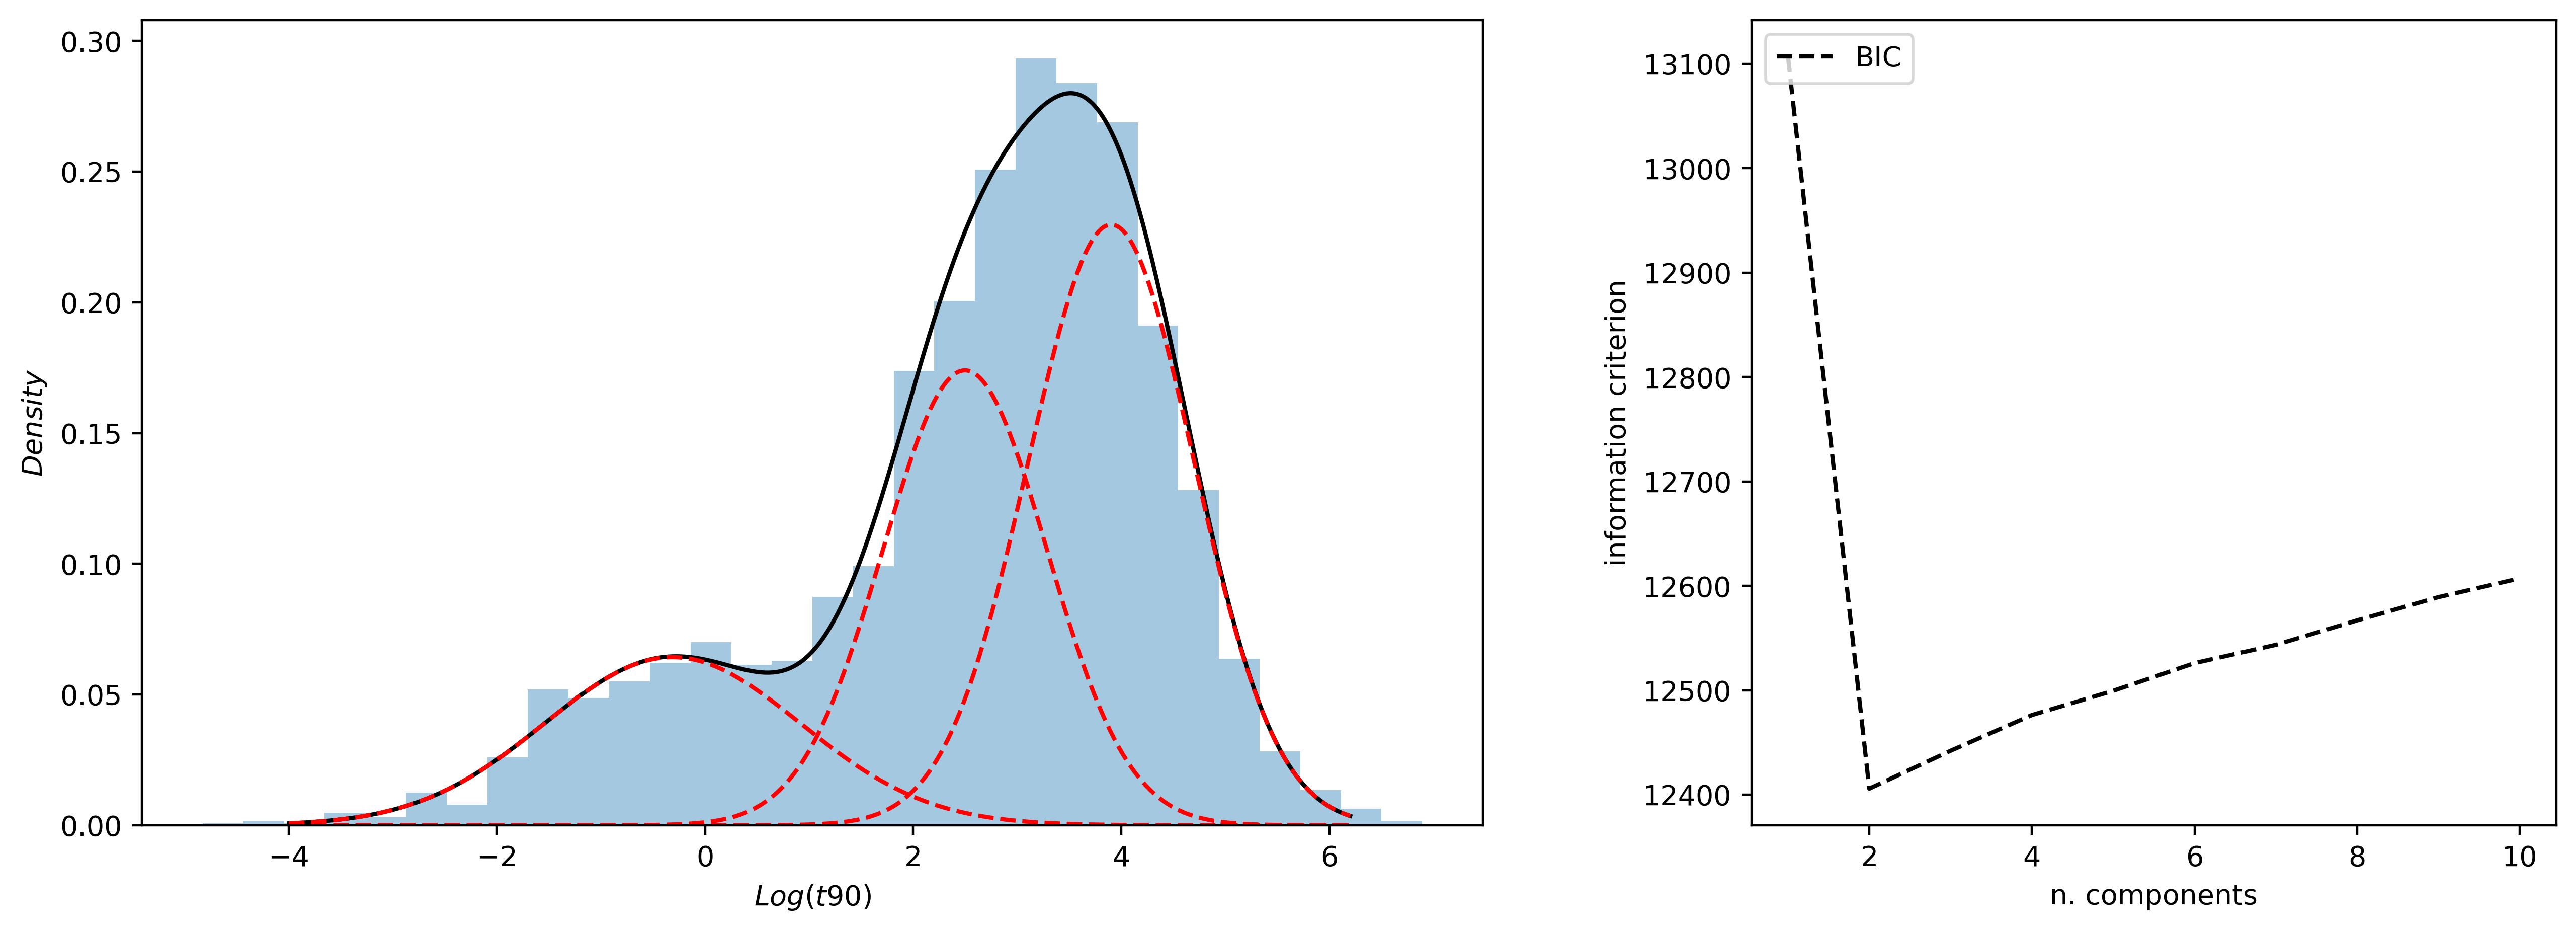

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

data=pd.read_excel("fermi202.xlsx")

X=np.log(data['t90'])

N = np.arange(1, 11)
models = [None for i in range(len(N))]
X=X.values.reshape(-1,1)

for i in range(len(N)):
    models[i] = GaussianMixture(N[i], init_params='kmeans').fit(X)

# compute the AIC and the BIC

#AIC1 = [m.aic(X) for m in models]
BIC1 = [m.bic(X) for m in models]

fig = plt.figure(figsize=(5, 5),dpi=400)
fig.subplots_adjust(left=2, right=6,bottom=0.7, top=1.5, wspace=1)
ax = fig.add_subplot(121)

M_best = models[2]
#M_best =GaussianMixture(n_components=3)

x = np.linspace(-4, 6.2, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k',color="red")

ax.set_xlabel('$Log(t90)$')
ax.set_ylabel('$Density$')

# plot 2: AIC and BIC
ax = fig.add_subplot(132)
#ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC1, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)
#plt.text(0.04, 0.96, "Best-fit Mixture",
       # ha='left', va='top', transform=ax.transAxes)
#plt.set_xlabel('$x$')
#plt.set_ylabel('$p(x)$')
print(M_best.means_)
print(np.sqrt(M_best.covariances_))
cov = M_best.covariances_
[ np.sqrt(  np.trace(cov[i]) ) for i in range(0,3) ]
models

#Scatter PLot of T50 and T90

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score


data1=pd.read_excel("scatter.xlsx")

x=np.log(data1['t90'])
y=np.log(data1['t50'])
d=pd.DataFrame()
d[0]=x
d[1]=y

N = np.arange(1, 11)
models = [None for i in range(len(N))]
for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(d)

# compute the AIC and the BIC
#AIC = [m.aic(d) for m in models]
BIC = [m.bic(d) for m in models]

M_best = models[np.argmin(BIC)]



fig = plt.figure(figsize=(5,5), dpi=250)
fig.subplots_adjust(left=1.5, right=6,bottom=0.6, top=1.5, wspace=0.5)
ax = fig.add_subplot(121)


gmm= M_best.fit(d)


labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
d3 = d[d['labels']== 3]
ax.scatter(d0[0], d0[1], c ='r')
ax.scatter(d1[0], d1[1], c ='yellow')
ax.scatter(d2[0], d2[1], c ='g')
ax.scatter(d3[0], d3[1], c ='blue')
ax.scatter(np.log(2.048),np.log(1.280), c='black')
#ax.scatter(d[0],d[1])
ax.set_xlabel('$Log(t90)$')
ax.set_ylabel('$log(t50)$')
ax.annotate("GRB170817", (np.log(2.048), np.log(1.280)))


M_best = models[np.argmin(BIC)]
# plot 2: AIC and BIC
ax = fig.add_subplot(122)
#ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)

print(gmm.means_)
cov = gmm.covariances_
#print(cov)
print([ np.sqrt(  np.trace(cov[i])/2) for i in range(0,4) ])
min(BIC)

[[ 3.45772132  2.56752992]
 [-0.69734614 -1.82422554]
 [ 1.83628274  0.90019242]
 [ 3.94344954  2.43854987]]
[1.0008029770583433, 0.9178254560436968, 1.1574108852875113, 0.9746623013586463]


15943.055045448642

In [ ]:
 len(labels)

3230